In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


/Users/kenji/opt/anaconda3/envs/PoC/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


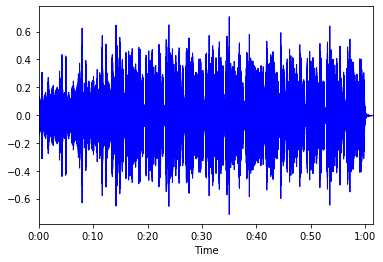

In [2]:
# Load the example clip
y, fs = librosa.load(librosa.util.example_audio_file())

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# 使用する音源
plt.figure()
librosa.display.waveplot(y, sr=fs, color='blue')

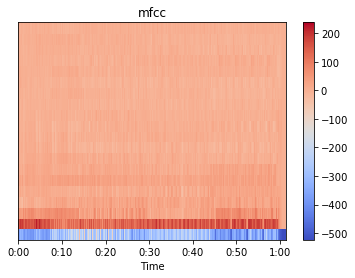

In [3]:
# mfcc

plt.figure()

mfccs = librosa.feature.mfcc(y, sr=fs)

librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.title('mfcc')
plt.colorbar()

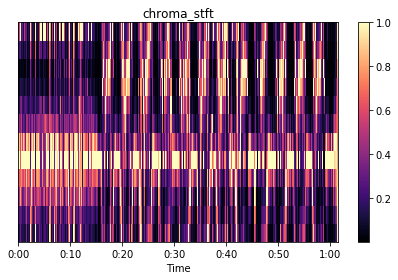

In [4]:
# chroma_stft

plt.figure()

chroma = librosa.feature.chroma_stft(y=y, sr=fs)

librosa.display.specshow(chroma, sr=fs, x_axis='time')
plt.title('chroma_stft')
plt.colorbar()
plt.tight_layout()

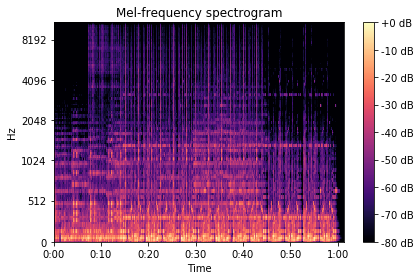

In [5]:
# melspectrogram

plt.figure()

mspm = librosa.feature.melspectrogram(y=y, sr=fs)
mspm_dB = librosa.power_to_db(mspm, ref=np.max)

librosa.display.specshow(mspm_dB, sr=fs, x_axis='time',y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()

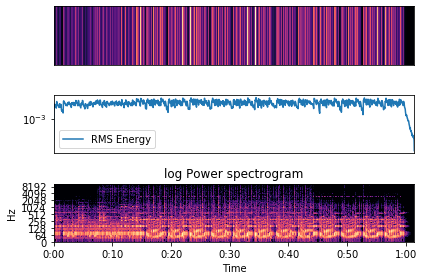

In [12]:
# rms

plt.figure()
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.feature.rms(y=y))

plt.subplot(3, 1, 2)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

In [ ]:
# rms

plt.figure()
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)



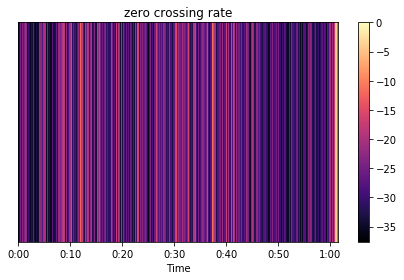

In [7]:
# zero crossing rate

plt.figure()
zcr = librosa.feature.zero_crossing_rate(y)
#librosa.display.specshow(zcr, sr=fs, x_axis='time')
librosa.display.specshow(librosa.amplitude_to_db(zcr, ref=np.max), sr=fs, x_axis='time')
plt.title('zero crossing rate')
plt.colorbar()
plt.tight_layout()

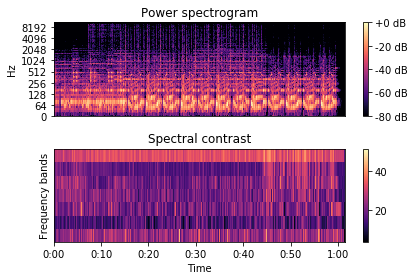

In [8]:
# spectral contrast

S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=fs)

plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log')

plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()

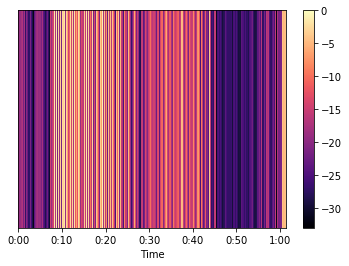

In [9]:
# spectral roll off

plt.figure()
rolloff = librosa.feature.spectral_rolloff(y=y, sr=fs)
librosa.display.specshow(librosa.amplitude_to_db(rolloff, ref=np.max), x_axis='time')
plt.colorbar()

NameError: name 'sr' is not defined

<Figure size 432x288 with 0 Axes>